<h2><font color="#004D7F" size=6>Unidad 4. Tratamiento de datos</font></h2>




<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Italo Contreras Peerez</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Cargando nuestro dataset](#section11)
* [2. Métricas de regresión](#section2)
    * [2.1. Error medio absoluto](#section21)
    * [2.2. Error cuadrático medio](#section22)
    * [2.3. $R^2$](#section23)
* [3. Feature Selection](#section3)
    * [3.1. Por coeficiente de correlación](#section31)
    * [3.2. Por Backward](#section32)
    * [3.3. Por selección univariable](#section33)
    * [3.3. Por eliminacion recursiva](#section33)
* [4. Feature importance - basada en modelos](#section4)
    * [4.1. Decision Trees](#section41)
    * [4.2. Extra Trees](#section42)
    * [4.3. Random Forest](#section43)
    * [4.4. LASSO](#section44)
* [5. Reduccion de dimensiones](#section5)
    

In [2]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

En este capitulo vamos a empezar a evaluar nuestro modelo con distintas metricas(dado el dataset que escogí usare metricas de regresion), vamos tambien a seleccionar las mejores caracteristicas usando distintos criterios y algortimos, muchos de estos aplicados tanto para modelos de regression como de clasificacion

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Cargando nuestro dataset</font>

Vamos a empezar cargando el dataset escogidoen un dataframe y separando este en 2, uno donde estan todas las caracteristicas menos el target y el otro que contenga al target

In [56]:
# Regression problem
import pandas as pd
filename_reg = 'data/forestfires.csv'
data = pd.read_csv(filename_reg)
data1=data.drop(['month'], axis=1)
data2=data1.drop(['day'], axis=1)
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
array_reg = data2.values
X=data2.drop("area",1)
Y=data2["area"]
data2

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Métricas de clasificación</font>

En esta sección revisaremos 3 de las métricas más comunes para evaluar predicciones sobre problemas de regresión de Machine Learning:
Si queremos explicar que tanto error tiene un modelo usamos:Error absoluto medio y Error cuadrático medio. Si queremos explicar que tan buen ajuste tiene un modelo usamos:$R^2$

<a id="section31"></a>
## <font color="#004D7F"> 2.1. Error medio absoluto</font>

Tambien conocido como 'MAE', es la suma de las diferencias absolutas entre las predicciones y los valores reales, un valor de 0 indica que no hay error o predicciones perfectas. Esta métrica se invierte por la función `cros_val_score`.
Primero vamos a calcular esta metrica usando una division por porcentaje 

In [26]:
# MAE
from sklearn . model_selection import train_test_split 
from sklearn . metrics import mean_absolute_error 
from sklearn . linear_model import LinearRegression

test_size = 0.33 
seed = 7 
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=test_size , random_state=seed) 
model = LinearRegression () 
model. fit (X_train , Y_train ) 
predicted = model. predict ( X_test )
MAE = mean_absolute_error(Y_test , predicted ) 
print (MAE)


20.23666176236031


Vemos que nuestro MAE es algo lejano al 0 por lo tanto nuestro modelo tiene un error no tan pequeño. Ahora usaremos la libreria cross_val_score(aqui se usa el MAE negativo pero el segnificado en valor absoluto es similar al positivo) y una validacion cruzada

In [27]:
#MAE Negativo
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=10,random_state=seed)
model=LinearRegression()
scoring='neg_mean_absolute_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print (f"Neg MAE: {results.mean()} ({ results.std()}%)") 
                    

Neg MAE: -20.74363771970664 (14.25247314435912%)


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que el en valor absoluto de este MAE negativo es similar al positivo. Sale ligeramente mayor porque aqui estamos tomando todos los datos a diferencia del proceso de arriba, sin embargo, no es mucha la diferencia.

In [ ]:
# Nuevo MAEeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
from sklearn . model_selection import train_test_split 
from sklearn . metrics import mean_absolute_error 
from sklearn . linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


test_size = 0.33 
seed = 7 
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=test_size , random_state=seed) 
model = LinearRegression () 
model. fit (X_train , Y_train ) 
predicted = model. predict ( X_test )
MAE = mean_absolute_error(Y_test , predicted ) 
print (MAE)

<a id="section32"></a>
## <font color="#004D7F"> 2.2. Error cuadrático medio</font>

Tambien conocido como MSE , es muy similar al error absoluto medio en el sentido de que proporciona una idea general de la magnitud del error. Igual que antes primero calcularemos esta metrica usando una division por porcentaje

In [30]:
#MSE
from sklearn . model_selection import KFold 
from sklearn . metrics import mean_squared_error
from sklearn . linear_model import LinearRegression

test_size = 0.33 
seed = 7 
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=test_size , random_state=seed) 
model = LinearRegression () 
model. fit (X_train , Y_train ) 
predicted = model. predict ( X_test )
MSE = mean_squared_error(Y_test , predicted ) 
print (MSE)

1330.287847008472


Vemos que al usar esta metrica sale un error mucho mayor que las 2 anteriores, es decir, que estas 2 metricas no eran tan precisas. Ahora usaremos la libreria cross_val_score(Aqui se usa el MSE negativo pero que en valor absoluto tiene un significado similar al positivo) y una validacion cruzada

In [31]:
#MSE Negativo
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=10,random_state=seed)
model=LinearRegression()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print (f"Neg MSE: {results.mean()} ({ results.std()}%)") 
   

Neg MSE: -4128.861078750497 (7977.634994360253%)


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que nos sale incluso mayor que la anterior y con una varianza. Esto es porque se estan usando todos los datos para calcular esta metrica, pero también podemos decir que nuestro modelo tiene mucho error, esto no sabemos si es bueno o malo, lo que nosotros quisieramos saber es si nuestro modelo se ha ajustado bien a nuestros datos y para eso usaremos el R al cuadrado

<a id="section33"></a>
## <font color="#004D7F"> 2.3. $R^2$</font>

La métrica $R^2$ proporciona una indicación del ajuste de un conjunto de predicciones a los valores reales. En la literatura estadística, esta medida se llama coeficiente de determinación. Este es un valor entre 0 (si no tiene ajuste) y 1 (ajuste perfecto). 

Puede ver que las predicciones se ajustan mal a los valores reales con un valor más cercano a cero y menor que 0.5.

In [32]:

from sklearn . model_selection import KFold 
from sklearn . metrics import r2_score
from sklearn . linear_model import LinearRegression
test_size = 0.33 
seed = 7 
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=test_size , random_state=seed) 
model = LinearRegression () 
model. fit (X_train , Y_train ) 
predicted = model. predict ( X_test )
R2 = r2_score(Y_test , predicted ) 
print (R2)

-0.05041817315031949


Vemos que el R al cuadrado de nuestro modelo es negativo y cercano al 0 es decir que no se ajusta bien a los datos que se tienen

In [33]:
#MSE Negativo
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=10,random_state=seed)
model=LinearRegression()
scoring='r2'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print (f"R2: {results.mean()} ({ results.std()}%)") 
  

R2: -81.56605242244481 (242.3776355289164%)


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que al tomar todos los datos el R2 sale incluso aún mas negativo además que la varianza es muy alta, con esto reafirmamos que los datos no se ajustan a nuestro modelo

<a id="section2"></a>
# <font color="#004D7F"> 2. Feature selection</font>

<a id="section33"></a>
## <font color="#004D7F"> 2.1. Por coeficiente de correlacion</font>

In [10]:
#importing libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split

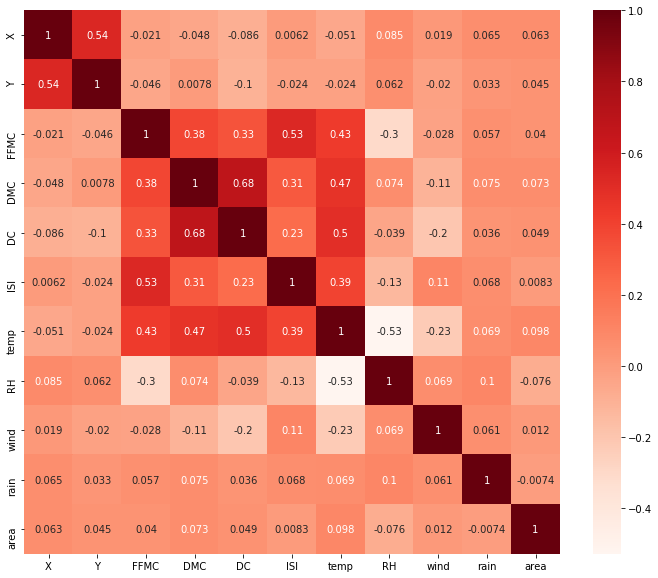

In [35]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor=data2.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

Vamos a analizar los atributos simples con el atributo clase

In [20]:
cor_target = abs(cor[ "area" ]) 
#Selecting highly correlated features 
relevant_features = cor_target [ cor_target >0.6] 
relevant_features

area    1.0
Name: area, dtype: float64

Vemos que no hay atributos que esten muy relacionados con el target ( aun poniendole como liminte inferior 0.6) sin embargo a pesar que estos se relacionan poco con el target, los que tienen más correlacion son: temp, RH y DMC

Vamos a analiar los atributos entre si

In [32]:
corr_matrix=data2.corr().abs()
#corr_matrix
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.60) ]
to_drop

['DC']

Vemos que no hay atributos que no hay para mayor a 0.75 que en principo deberia ser el criterin, entonces lo bajamos a 0.6 y vemos que aparece el atributo DC 

<a id="section33"></a>
## <font color="#004D7F"> 2.2. Por Backward</font>

In [59]:
import statsmodels.api as sm
X_1 = sm.add_constant(X) 
model = sm.OLS(Y,X_1).fit()
model.pvalues


const    0.919536
X        0.188332
Y        0.835306
FFMC     0.952716
DMC      0.250079
DC       0.841361
ISI      0.355342
temp     0.309854
RH       0.331549
wind     0.351500
rain     0.725269
dtype: float64

Observamos que todas las caracteristicas son superiores a 0.05, pero no podemos eliminar todas. Entonces debemos usar otra forma para eliminar atributos puesto que esta no me esta dando resultados

<a id="section33"></a>
## <font color="#004D7F"> 2.3. Por Selección Univariable</font>

Aqui se van a evaluar los atributos con pruebas estadisticas, en este caso usaremos la de chi cuadrado que es la mas comun, para ello importamos una libreria de scikilearn

In [37]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2,k=4) 
fit = test.fit(X,Y) 
# summarize scores
np. set_printoptions ( precision=3) 
print ( list (data .columns) ) 
print ( fit . scores_ ) 
features = fit . transform(X) 
# summarize selected features 
print ( features [0:5 ,:])


ValueError: Unknown label type: (array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 3.60000e-01, 4.30000e-01,
       4.70000e-01, 5.50000e-01, 6.10000e-01, 7.10000e-01, 7.70000e-01,
       9.00000e-01, 9.50000e-01, 9.60000e-01, 1.07000e+00, 1.12000e+00,
       1.19000e+00, 1.36000e+00, 1.43000e+00, 1.46000e+00, 1.46000e+00,
       1.56000e+00, 1.61000e+00, 1.63000e+00, 1.64000e+00, 1.69000e+00,
       1.75000e+00, 1.90000e+00, 1.94000e+00, 1.95000e+00, 2.01000e+00,
       2.14000e+00, 2.29000e+00, 2.51000e+00, 2.53000e+00, 2.55000e+00,
       2.57000e+00, 2.69000e+00, 2.74000e+00, 3.07000e+00, 3.50000e+00,
       4.53000e+00, 4.61000e+00, 4.69000e+00, 4.88000e+00, 5.23000e+00,
       5.33000e+00, 5.44000e+00, 6.38000e+00, 6.83000e+00, 6.96000e+00,
       7.04000e+00, 7.19000e+00, 7.30000e+00, 7.40000e+00, 8.24000e+00,
       8.31000e+00, 8.68000e+00, 8.71000e+00, 9.41000e+00, 1.00100e+01,
       1.00200e+01, 1.09300e+01, 1.10600e+01, 1.12400e+01, 1.13200e+01,
       1.15300e+01, 1.21000e+01, 1.30500e+01, 1.37000e+01, 1.39900e+01,
       1.45700e+01, 1.54500e+01, 1.72000e+01, 1.92300e+01, 2.34100e+01,
       2.42300e+01, 2.60000e+01, 2.61300e+01, 2.73500e+01, 2.86600e+01,
       2.86600e+01, 2.94800e+01, 3.03200e+01, 3.17200e+01, 3.18600e+01,
       3.20700e+01, 3.58800e+01, 3.68500e+01, 3.70200e+01, 3.77100e+01,
       4.85500e+01, 4.93700e+01, 5.83000e+01, 6.41000e+01, 7.13000e+01,
       8.84900e+01, 9.51800e+01, 1.03390e+02, 1.05660e+02, 1.54880e+02,
       1.96480e+02, 2.00940e+02, 2.12880e+02, 1.09084e+03, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.01300e+01, 0.00000e+00, 2.87000e+00,
       7.60000e-01, 9.00000e-02, 7.50000e-01, 0.00000e+00, 2.47000e+00,
       6.80000e-01, 2.40000e-01, 2.10000e-01, 1.52000e+00, 1.03400e+01,
       0.00000e+00, 8.02000e+00, 6.80000e-01, 0.00000e+00, 1.38000e+00,
       8.85000e+00, 3.30000e+00, 4.25000e+00, 1.56000e+00, 6.54000e+00,
       7.90000e-01, 1.70000e-01, 0.00000e+00, 0.00000e+00, 4.40000e+00,
       5.20000e-01, 9.27000e+00, 3.09000e+00, 8.98000e+00, 1.11900e+01,
       5.38000e+00, 1.78500e+01, 1.07300e+01, 2.20300e+01, 9.77000e+00,
       9.27000e+00, 2.47700e+01, 0.00000e+00, 1.10000e+00, 2.42400e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 8.00000e+00, 2.64000e+00, 8.64500e+01, 6.57000e+00,
       0.00000e+00, 9.00000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 3.52000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 4.10000e-01, 5.18000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.42900e+01, 0.00000e+00, 0.00000e+00, 1.58000e+00,
       0.00000e+00, 0.00000e+00, 3.78000e+00, 0.00000e+00, 4.41000e+00,
       3.43600e+01, 7.21000e+00, 1.01000e+00, 2.18000e+00, 4.42000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.33000e+00,
       6.58000e+00, 1.56400e+01, 1.12200e+01, 2.13000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 5.60400e+01, 7.48000e+00, 1.47000e+00,
       3.93000e+00, 0.00000e+00, 0.00000e+00, 2.18000e+00, 6.10000e+00,
       5.83000e+00, 2.81900e+01, 0.00000e+00, 0.00000e+00, 1.64000e+00,
       3.71000e+00, 7.31000e+00, 2.03000e+00, 1.72000e+00, 5.97000e+00,
       1.30600e+01, 1.26000e+00, 0.00000e+00, 0.00000e+00, 8.12000e+00,
       1.09000e+00, 3.94000e+00, 5.20000e-01, 2.93000e+00, 5.65000e+00,
       2.00300e+01, 1.75000e+00, 0.00000e+00, 1.26400e+01, 0.00000e+00,
       1.10600e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.83000e+01,
       3.93500e+01, 0.00000e+00, 1.74630e+02, 0.00000e+00, 0.00000e+00,
       7.73000e+00, 1.63300e+01, 5.86000e+00, 4.28700e+01, 1.21800e+01,
       1.60000e+01, 2.45900e+01, 0.00000e+00, 2.87400e+01, 0.00000e+00,
       9.96000e+00, 3.01800e+01, 7.07600e+01, 0.00000e+00, 0.00000e+00,
       5.17800e+01, 3.64000e+00, 3.63000e+00, 0.00000e+00, 0.00000e+00,
       8.16000e+00, 4.95000e+00, 0.00000e+00, 0.00000e+00, 6.04000e+00,
       0.00000e+00, 3.95000e+00, 0.00000e+00, 7.80000e+00, 0.00000e+00,
       0.00000e+00, 4.62000e+00, 1.63000e+00, 0.00000e+00, 0.00000e+00,
       7.46280e+02, 7.02000e+00, 0.00000e+00, 2.44000e+00, 3.05000e+00,
       1.85760e+02, 0.00000e+00, 6.30000e+00, 7.20000e-01, 4.96000e+00,
       0.00000e+00, 0.00000e+00, 2.35000e+00, 0.00000e+00, 3.20000e+00,
       0.00000e+00, 6.36000e+00, 0.00000e+00, 1.53400e+01, 0.00000e+00,
       0.00000e+00, 5.40000e-01, 0.00000e+00, 6.43000e+00, 3.30000e-01,
       0.00000e+00, 1.23000e+00, 3.35000e+00, 0.00000e+00, 9.96000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       6.43000e+00, 9.71000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 8.27500e+01, 3.32000e+00, 1.94000e+00,
       0.00000e+00, 0.00000e+00, 3.71000e+00, 5.39000e+00, 2.14000e+00,
       6.84000e+00, 3.18000e+00, 5.55000e+00, 6.61000e+00, 6.11300e+01,
       0.00000e+00, 3.84800e+01, 1.94000e+00, 7.03200e+01, 1.00800e+01,
       3.19000e+00, 1.76000e+00, 7.36000e+00, 2.21000e+00, 2.78530e+02,
       2.75000e+00, 0.00000e+00, 1.29000e+00, 0.00000e+00, 2.64300e+01,
       2.07000e+00, 2.00000e+00, 1.64000e+01, 4.67000e+01, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 4.33200e+01, 8.59000e+00,
       0.00000e+00, 2.77000e+00, 1.46800e+01, 4.05400e+01, 1.08200e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.95000e+00, 4.95900e+01,
       5.80000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.17000e+00,
       4.30000e-01, 0.00000e+00, 6.44000e+00, 5.42900e+01, 1.11600e+01,
       0.00000e+00, 0.00000e+00]),)

Vemos que obtenemos un error puesto que el atritbuo clase de nuestro dataframe es para un problema de regresión

<a id="section33"></a>
## <font color="#004D7F"> 2.4. Por Eliminacion recursiva</font>

funciona eliminando recursivamente los atributos y construyendo un modelo sobre los atributos que quedan. Utiliza la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a predecir el atributo objetivo.

En este caso le ponemos un k = 3 par que seleccione las principales caracteristicas

In [38]:
from sklearn.feature_selection import RFE
from sklearn . linear_model import LinearRegression
model = LinearRegression() 
rfe = RFE(model, 3) 
fit = rfe . fit (X, Y) 
print(list (data2.columns) ) 
print(f"Num Features : { fit . n_features_ } " ) 
print(f"Selected Features : { fit . support_} " )
print (f"Feature Ranking: { fit . ranking_} " )


['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Num Features : 3 
Selected Features : [ True False False False False False False False  True  True] 
Feature Ranking: [1 3 7 6 8 4 2 5 1 1] 


Vemos que los atributos mas importantes por este metodo son: x, win y rain, ya que tienen en el vecor de Feature Ranking el valro de 1. Si queremos saber la importancia del resto de atributos luego de esos tres debemos ver el valor que le corresponde en el vector.

<a id="section4"></a>
# <font color="#004D7F"> 4. Feature importance - basada en modelos</font>

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Decision Trees</font>

Tenemos que tener cuidado en el valor que le damos al depth para caer en el menor overfiting posible. Primero intentaremos con depth igual a 3

In [39]:
from sklearn . tree import DecisionTreeRegressor 
from sklearn . metrics import r2_score 
from sklearn . model_selection import train_test_split
import numpy as np

test_size=0.33
seed=7
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size= test_size , random_state=seed) 
    
depth = 3 
tree = DecisionTreeRegressor( criterion='mse', max_depth=depth) 
tree . fit (X_train , Y_train ) 


subset = np.unique( tree . tree_ . feature [ tree . tree_ . feature >=0])  
print (f"Variables: {X.shape[1]}") 
print (f"Variables utilizadas : {subset}") 
print (f"Training:  {tree.score(X_train , Y_train ) .round(2)}" ) 
print (f"Test :  {tree . score (X_test , Y_test ) .round(2)}" )
print (data2.columns[0] , data2.columns[1], data2.columns[3], data2.columns[6] )

Variables: 10
Variables utilizadas : [0 1 3 6]
Training:  0.71
Test :  -0.45
X Y DMC temp


Vemos que de las 10 variables iniciales se deberian usar la 0,1,3,6 que son X,Y,DMC y temp. Vemos también que hay un overfiting notorio puesto que es con la data de entrenamiento se tiene un r2 de 0.71, es decir que los datos se ajustan muy bien con el modelo y en el test tiene un -0.45, es decir los datos no se ajustan al modelo

In [40]:
from sklearn . tree import DecisionTreeRegressor 
from sklearn . metrics import r2_score 
from sklearn . model_selection import train_test_split
import numpy as np

test_size=0.33
seed=7
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size= test_size , random_state=seed) 
    
depth = 2
tree = DecisionTreeRegressor( criterion='mse', max_depth=depth) 
tree . fit (X_train , Y_train ) 


subset = np.unique( tree . tree_ . feature [ tree . tree_ . feature >=0])  
print (f"Variables: {X.shape[1]}") 
print (f"Variables utilizadas : {subset}") 
print (f"Training:  {tree.score(X_train , Y_train ) .round(2)}" ) 
print (f"Test :  {tree . score (X_test , Y_test ) .round(2)}" )
print (data2.columns[1] , data2.columns[6] ) 



Variables: 10
Variables utilizadas : [1 6]
Training:  0.63
Test :  -0.03
Y temp


Vemos que del total de variables (10) se deberian usar la 1,6 (igual que en el caso anterior tambien estan Y y temp) por lo tanto podemos entender que estas variables son importantes para el modelo. El r2 en el entrenamiento es 63%, es decir, los datos se ajustan de alguna forma al modelo. Vemos que en el test es -0.1 , es decir, ha habido un overfiting, pero mucho menor que cuando le pusimos depth=3. 
Con estos 2 analisis conlcuimos que segun el algoritmo de Arboles de decisión deberiamos usar las variables Y y temp. Aun asi al ser r2 0.60 para train y casi 0 para test podemos ver que incluso considerando estas 2 variables el modelo no es robusto

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Extra Trees</font>

Al intentar usar el algoritmo de Extra Trees tenemos que usar la clase ExtraTreesRegressor puesto que el dataset que estoy trabajando es de un problema de regresión

In [41]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


model = ExtraTreesRegressor () 
model.fit(X,Y) 
print(list(data2.columns)) 
print(model.feature_importances_)

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
[0.06667019 0.05200396 0.09425509 0.14503998 0.13660643 0.07593428
 0.15787548 0.13536957 0.13560209 0.00064293]


De aqui podemos seleccionar a los atributos que tienen mayores valores en el vector, es decir, a DMC, temp y RH, vemos que los atributos DMC y temp tambien se obtienen con el arbol de decision simple por lo que podemos ir prestandole mas atencion a estos atributos como los mas importantes 

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Random Forest</font>

En este caso usaremos la metrica R2 igual que para un arbol de decision

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn . metrics import r2_score 
from sklearn . model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X, Y,test_size= 0.33 , random_state=7) 
#mean_squared_error    

forest = RandomForestRegressor( n_estimators=100) 
forest.fit(X_train , Y_train )

importances=forest.feature_importances_
Y_pred= forest . predict ( X_test ) 

print (f"Coeficiente de correlacion (con todas las variables ) : {r2_score( Y_test , Y_pred)} " )




Coeficiente de correlacion (con todas las variables ) : -0.8519814335010569 


Vemos que ya de por si tenemos un R2 negativo, es decir, al considerar todas las variables el modelo no se ajusta a los datos

<a id="section44"></a>
## <font color="#004D7F"> 4.4. LASSO</font>

Best alpha using built−in LassoCV: 16.767859598304952
Best score using built−in LassoCV: 0.011677393663357405
Lasso picked 3 variables and eliminated the other 7 variables 


Text(0.5, 1.0, 'Feature importance usando Lasso Model')

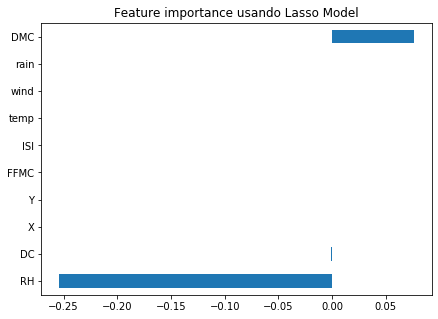

In [49]:
import pandas as pd 
import matplotlib . pyplot as ptl 
from sklearn . model_selection import train_test_split 
from sklearn . linear_model import LassoCV

reg = LassoCV() 
reg . fit (X_reg,Y_reg) 
print (f"Best alpha using built−in LassoCV: {reg.alpha_}") 
print (f"Best score using built−in LassoCV: {reg.score(X,Y)}" ) 
coef = pd. Series (reg .coef_ , index = X.columns) 

print ( "Lasso picked " + str (sum( coef != 0) ) + " variables and eliminated the other " + str (sum( coef == 0) ) + " variables " )

imp_coef = coef . sort_values () 
ptl . rcParams['figure.figsize'] = (7.0 , 5.0) 
imp_coef . plot (kind = "barh" ) 
ptl. title ( "Feature importance usando Lasso Model" )


Vemos que el mejor alpha para este algoritmo es de 16.7678 y el mejor score sera 0.01, luego se seleccione el coeficiente para las variables para despues eliminar las que tengan un coeficiente igual a 0. En este caso vemos que escogio 3 variables y elimina otras 7. Esto tiene sentido porque en algoritmos anteriores vemos que hay 3 caracteristcas que son las masimportantes(entre 2 o 3)
Estas 3 variables que quedan se muestran en el grafico con barras.

<a id="section5"></a>
# <font color="#004D7F"> 5. Reduccion de dimensiones</font>

Aca trataremos de disminuir caracteristicas pero asumiendo la mayor cantidad de varianza posible. Vamos a crear 3 componentes

In [51]:
from sklearn . decomposition import PCA 

# PCA con k=3 
k=3 
pca = PCA(n_components=k) 
fit = pca. fit (X) 
X_transform = pca. transform(X) 
# summarize components 
C = pca.components_ 
print (f"Explained Variance : { fit.explained_variance_ratio_ } " ) 
print (f"Componentes: {C}") 
# Convertimos a dataframe 22 > df_pca = pd.DataFrame(data=X_transform ,columns=[ ’PC1’ , ’PC2’ , ’PC3’ ])


Explained Variance : [0.96253861 0.03232349 0.00416487] 
Componentes: [[ 7.84161966e-04  4.76391370e-04 -7.39788693e-03 -1.79460941e-01
  -9.83655890e-01 -4.27009270e-03 -1.15707684e-02  2.26100024e-03
   1.43490489e-03 -4.47911510e-05]
 [ 9.27379422e-04  2.90688105e-03  2.40648773e-02  9.81553201e-01
  -1.79440679e-01  1.93781450e-02  1.95041695e-02  5.48221278e-02
   2.08301747e-03  4.46240649e-04]
 [ 1.08658320e-02  3.13357839e-03 -1.20638390e-01 -4.36605345e-02
   1.37191816e-02 -5.35283391e-02 -2.01160835e-01  9.69459104e-01
   6.32273979e-03  1.46248864e-03]]


Vemos que el 1er componente asume casi toda la varianza de los datos(96%) , el 2do 3% y el ultimo 0.4% 
Vemos tambien el vector de componentes que se multiplicaran con los datos para crear nuevos valores

Ahora vamos efectuar dichar multiplicacion

In [54]:
df_pca = pd.DataFrame(data=X_transform ,columns=[ 'PC1', 'PC2' , 'PC3' ])
df_pca


,PC1,PC2,PC3
0,461.615570,-1.722639,6.920893
1,-105.643150,-96.508607,-5.672898
2,-124.601836,-91.621241,-5.104603
3,476.909700,10.990991,50.080373
4,449.363801,24.346071,51.191879
...,...,...,...
512,-106.051696,-75.148701,-8.273388
513,-105.891893,-73.118204,30.723368
514,-105.880842,-73.180167,29.954741
515,-72.096250,22.635860,-4.802017


Vemos que con este algoritmos no eliminamos caracteristicas en si, lo que hacemos es agruparlas en clusters y perder la menor cantidad de informacion posible